## Clustering - Airlines_Data

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
Airlines_Data=pd.read_excel("C:\\ExcelR\\Assignments\\Clustering\\EastWestAirlines.xlsx",sheet_name="data")

In [3]:
Airlines_Data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Understanding

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:


1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [4]:
Airlines_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


#### No Null entries found
#### All Datapoints are Integers

## Scaling the Data

In [5]:
Standard_Scalar=StandardScaler()
X=pd.DataFrame(Standard_Scalar.fit_transform(Airlines_Data))

In [6]:
X.columns=Airlines_Data.columns
X.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


## Cluster Models

## Hierarchial Clustering

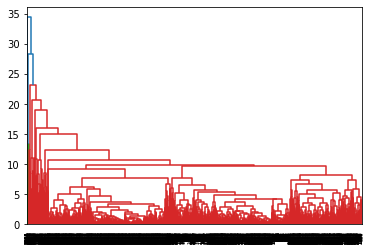

<Figure size 864x864 with 0 Axes>

In [7]:
Dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.figure(figsize=[12,12])
plt.show()

### Using GaussianMixture to find the Optimal number of clusters

In [8]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(X)
        score.append((cov,n_comp,gmm.bic(X)))
score

[('spherical', 1, 136291.86405779066),
 ('spherical', 2, 114338.64513929289),
 ('spherical', 3, 99572.00051001158),
 ('spherical', 4, 89886.87977535014),
 ('spherical', 5, 89201.60826814688),
 ('spherical', 6, 86894.55018131288),
 ('spherical', 7, 84008.53456253305),
 ('spherical', 8, 81206.76211296183),
 ('spherical', 9, 81442.39106648108),
 ('spherical', 10, 76130.02672485767),
 ('spherical', 11, 74778.44408266644),
 ('spherical', 12, 73099.67249897707),
 ('spherical', 13, 68142.66145499743),
 ('spherical', 14, 67681.85873269133),
 ('spherical', 15, 68583.33069519946),
 ('spherical', 16, 65334.47032009309),
 ('spherical', 17, 67745.09027153942),
 ('spherical', 18, 60302.72900336882),
 ('spherical', 19, 60640.58167353019),
 ('spherical', 20, 59357.35521280969),
 ('spherical', 21, 60583.84597071947),
 ('spherical', 22, 59254.71503742751),
 ('spherical', 23, 60338.00224011228),
 ('spherical', 24, 58359.43356659521),
 ('spherical', 25, 54369.80453421736),
 ('spherical', 26, 53998.4020542

In [9]:
GM=pd.DataFrame(score)
GM.columns=["covariance","components","score"]

GM.head()

,covariance,components,score
0,spherical,1,136291.864058
1,spherical,2,114338.645139
2,spherical,3,99572.000510
3,spherical,4,89886.879775
4,spherical,5,89201.608268


In [10]:
min(GM["score"])

-207346.07498456386

#### From the scores of gaussian mixture we can infer that n_clusters can be chosen from the range of 22 to 25 which  will be good for the cluster model.

In [11]:
Hierarchial_Clustering = AgglomerativeClustering(n_clusters=25, linkage = 'complete')
Hc_Pred=Hierarchial_Clustering.fit_predict(X)

Airlines_Data['Hc_Pred']=pd.Series(Hc_Pred)
Airlines_Data["Hc_Pred"].value_counts()

14    1461
9     1433
3      853
2       49
1       37
6       28
15      22
7       18
10      16
23      14
13      12
0       11
16       9
4        5
8        5
19       5
17       5
11       4
22       3
18       2
5        2
21       2
12       1
20       1
24       1
Name: Hc_Pred, dtype: int64

## K-means clustering

#### Finding Optimal number of clusters using Elbow Curve

In [12]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(pd.DataFrame(wcss))

               0
0   47988.000000
1   39018.847430
2   34529.168666
3   30616.623636
4   26894.753060
5   23490.749029
6   21885.368245
7   19330.695176
8   18015.300659
9   16846.161847
10  15774.923677
11  14961.202455
12  14217.408474
13  13724.239713
14  13180.285551
15  12661.009611
16  12183.550274
17  11760.697597
18  11385.396273
19  11061.487628
20  10636.656635
21  10557.028205
22  10043.973199
23   9887.318831
24   9686.228108
25   9493.739622
26   9372.357217
27   9229.822601
28   9020.269836


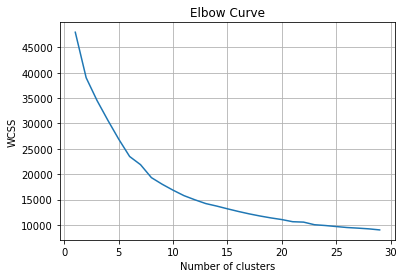

In [13]:
plt.plot(range(1, 30), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

#### From the Elbow curve we can infer that the optimal number of clusters ranges from 20 to 25

In [14]:
Kmeans = KMeans(n_clusters=25,random_state=0)
Kmeans.fit(X)

KMeans(n_clusters=25, random_state=0)

In [15]:
pd.DataFrame(Kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.160383,0.543814,-0.161517,1.223757,-0.098242,-0.062767,0.678323,0.487004,-0.217417,-0.242320,1.165964,-0.766919
1,-0.101068,-0.388904,-0.164751,-0.753958,-0.098242,-0.062767,-0.622587,-0.820092,-0.251367,-0.261238,0.039826,-0.766919
2,1.011210,-0.211530,-0.177122,-0.103158,-0.098242,-0.062767,-0.236571,0.536029,-0.271155,-0.295164,-1.004510,-0.766919
3,-1.024204,-0.031366,-0.130592,1.047698,-0.098242,-0.062767,0.536329,0.640957,-0.126661,-0.149404,1.010688,1.303918
4,-0.135965,0.481768,0.009931,1.352725,-0.098242,-0.062767,1.300843,2.155141,1.559643,1.586478,0.117359,0.915636
5,-1.232284,-0.242911,-0.159499,-0.720368,-0.098242,-0.048884,-0.605534,-0.646025,-0.223074,-0.240696,1.248122,-0.766919
6,-0.301522,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527
7,0.601308,-0.168912,-0.155241,1.013280,-0.098242,-0.044139,0.545393,0.641294,-0.204201,-0.214516,-0.563679,1.303918
8,0.169893,-0.212081,-0.100118,-0.769578,13.448976,-0.062767,0.135234,0.763483,0.166147,0.481559,-0.020837,0.061416
9,-0.253989,0.526906,8.922289,-0.118368,-0.098242,-0.062767,-0.083448,0.095322,0.461796,0.501561,0.247101,0.447020


## DBSCAN 

#### Taking values of eps as 2 and minimum_samples as 2 gives us the optimal result.

In [16]:
Dbscan = DBSCAN(eps=2, min_samples=2)
Dbscan.fit(X)

DBSCAN(eps=2, min_samples=2)

In [17]:
Dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
Airlines_Data['Dbscan_Labels']=pd.Series(Dbscan.labels_)
Airlines_Data["Dbscan_Labels"].value_counts()

 0     2451
 1     1331
-1      147
 8       16
 5        9
 3        7
 11       4
 15       4
 4        3
 7        3
 14       2
 19       2
 18       2
 17       2
 16       2
 10       2
 13       2
 12       2
 9        2
 6        2
 2        2
 20       2
Name: Dbscan_Labels, dtype: int64

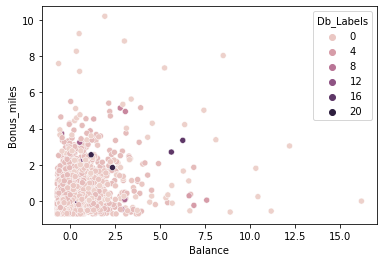

<Figure size 1440x1440 with 0 Axes>

In [20]:
Z=X.copy()
Z["Db_Labels"]=pd.Series(Dbscan.labels_)

sns.scatterplot(x=Z["Balance"],y=Z["Bonus_miles"],hue=Z["Db_Labels"])
plt.figure(figsize=[20,20])
plt.show()

#### Inference
1. Since there are many outliers in the dataset the clustering techniques provide varies results.
2. DBSCAN technique is useful in grouping the dense region with many data points. However it fails to group the outliers in the data set in a proper cluster.
3. k-means technique is the best suited technique to apply in this dataset as it takes into account all the data points.
